<h2><b>Importing Requirements</b></h2>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
import joblib


<h2><b>Data Loading</b></h2>

In [102]:
ddf = pd.read_csv('diabetes.csv')

<br>Data Info:<br>

In [103]:
ddf.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [104]:
ddf.shape

(768, 9)

In [105]:
ddf.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
ddf['Outcome'].value_counts()


Outcome
0    500
1    268
Name: count, dtype: int64

In [107]:
ddf.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


<b>Missing Values</b>


 Handling Missing Values of our Dataframe
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


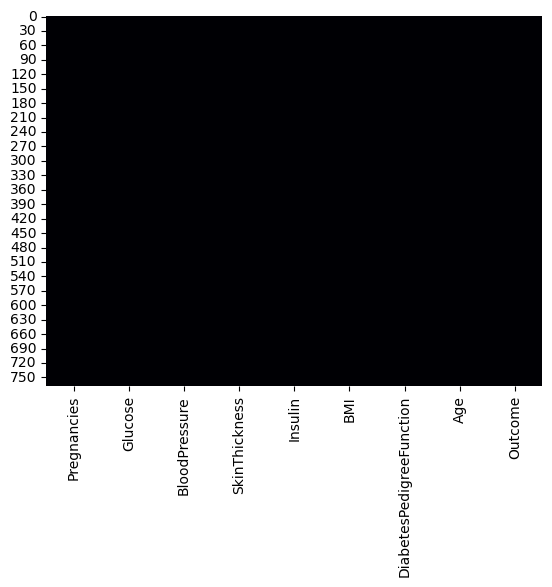

In [108]:
sns.heatmap(ddf.isnull(),cmap = 'magma',cbar = False)

print("\n Handling Missing Values of our Dataframe")
print(ddf.isnull().sum())


Checking Duplicate Values

In [109]:
duplicates = ddf[ddf.duplicated()]

print(f"Repeated coloumn value: {duplicates.shape[0]}")

Repeated coloumn value: 0


<b>Outliers</b>

In [ ]:
outliers_iqr = pd.DataFrame()

for col in ddf.columns:  
    Q1 = ddf[col].quantile(0.25)
    Q3 = ddf[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_rows = ddf[(ddf[col] < lower_bound) | (ddf[col] > upper_bound)]
    outlier_rows = outlier_rows.copy()
    outlier_rows["Outlier_Column"] = col  
    outliers_iqr = pd.concat([outliers_iqr, outlier_rows])



"Winsorizing: Replacing outliers by capping them at specified limits"

In [ ]:
df_winsorized = ddf.copy()

for col in ddf.columns:
    Q1 = ddf[col].quantile(0.25)
    Q3 = ddf[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_winsorized[col] = ddf[col].clip(lower_bound, upper_bound)


In [ ]:
changed = (ddf != df_winsorized)
print("Number of changed cells:", changed.sum().sum())

diff = ddf[changed]
print(diff.head())

Değişen hücre sayısı: 146
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0          NaN      NaN            NaN            NaN      NaN  NaN   
1          NaN      NaN            NaN            NaN      NaN  NaN   
2          NaN      NaN            NaN            NaN      NaN  NaN   
3          NaN      NaN            NaN            NaN      NaN  NaN   
4          NaN      NaN            NaN            NaN      NaN  NaN   

   DiabetesPedigreeFunction  Age  Outcome  
0                       NaN  NaN      NaN  
1                       NaN  NaN      NaN  
2                       NaN  NaN      NaN  
3                       NaN  NaN      NaN  
4                     2.288  NaN      NaN  


<h1><b>Data Splitting & Modelling
</b></h1>

<br>Spliting the Data<br>

In [113]:
x_org = df_winsorized.drop(columns='Outcome')
y = df_winsorized['Outcome']


Data Standardization

In [114]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(x_org)


Train-Test Splitting

In [115]:
x_train, x_test, y_train, y_test = train_test_split(standardized_data,y, test_size = 0.2, stratify=y, random_state=2)

In [116]:
print(standardized_data.shape, x_train.shape, x_test.shape)

(768, 8) (614, 8) (154, 8)


Model Training


In [117]:
classifier = svm.SVC(kernel='linear', probability=True)


In [ ]:
classifier.fit(x_train, y_train)

SVC(kernel='linear', probability=True)

In [119]:
joblib.dump(classifier, "diabetes_classifier.pkl")
joblib.dump(scaler, "diabetes_scaler.pkl")

['diabetes_scaler.pkl']

Accuracy Score

In [ ]:
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [121]:
print('Score of the trained data : ', training_data_accuracy)

Score of the trained data :  0.7850162866449512


In [ ]:
x_test_prediction = classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [123]:
print('Score of the tested data : ', test_data_accuracy)

print('Score of the trained data : ', training_data_accuracy)

Score of the tested data :  0.7727272727272727
Score of the trained data :  0.7850162866449512


Prediction System

In [ ]:
input_data_list = [
    (5, 166, 72, 19, 175, 25.8, 0.587, 51),   
    (2, 90, 60, 20, 70, 22.5, 0.1, 25)        
]

for i, input_data in enumerate(input_data_list, start=1):
    input_df = pd.DataFrame([input_data], columns=x_org.columns)
    std_data = scaler.transform(input_df)
    prediction = classifier.predict(std_data)

    print(f"\n🔎 Input for Test {i}: {input_data}")
    print(f"🔢 Model Prediction: {prediction[0]}")
    if prediction[0] == 0:
        print("The person is **NOT diabetic**")
    else:
        print("The person **IS diabetic**")




🔎 Test 1 için input: (5, 166, 72, 19, 175, 25.8, 0.587, 51)
🔢 Model Tahmini: 1
❗ The person **IS diabetic**

🔎 Test 2 için input: (2, 90, 60, 20, 70, 22.5, 0.1, 25)
🔢 Model Tahmini: 0
✅ The person is **NOT diabetic**


In [ ]:
feature_names = list(x_org.columns)  
joblib.dump(feature_names, "diabetes_feature_names.pkl")

['diabetes_feature_names.pkl']

In [126]:
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']